# Metrics: RMSE, MAE, MSE, MAPE, MPE overview

We want to asses performance of the model. Do we actually can deploy it to real circumstances ? Can it <code>**predict data that the model has never seen before ?**</code><br>
After model fitting, we would like assess performace of model by comparing model predictions to actual true data. So far what we did is took all the data then divided into training and testing with <code>**80-20 % proportions**</code>.  So we will use this 20% of data to asses our model performance. Important <code>**key point**</code> is that it should not be seen by the model during training <code>**EVER!**</code>.  Image this as if you are student that is doing a lot of practise to solve problems and eventually you get to exam with new never seen tasks but underlying concept how to solve the is similar to what you where doing durring learning and practice. This means we want the learning algoritmh <code>**to generalize, to learn**</code> and apply this knowledge on a data set never seen before. 

## Topics

 * <code>**Loss VS Metric**</code>
 * <code>**Mean absolute error (MAE)**</code>
 * <code>**Mean squared error (MSE)**</code>
 * <code>**Root mean squared error (RMSE)**</code>
 * <code>**Coefficient of determination (R² score)**</code>
 * <code>**Adjusted R² score**</code>
 * <code>**Using the metrics**</code>
 
Later will be fully covered but its okay to skip for now:
 
 * <code>**Mean absolute percentage error (MAPE)**</code>
 * <code>**Mean percentage error (MPE)**</code>

<div class="alert alert-block alert-info">
<h2>Loss and cost</h2>
Loss and cost functions are not the same. Although cost function and loss function are synonymous and used interchangeably but they are different.<br>
    
<code>**A loss function/error function is for a single training example/input. A cost function, is the average loss over the entire training dataset**</code>
</div>

### Outline

<code>**Metrics are what we rely on to choose models and assess their performance**</code>
<br>

<code>**Understanding what a metric conveys can help us to know which one to use**</code>
<br>

<code>**Interpreting metrics correctly allows us to use them for model selection and parameter assesement**</code>

Lets image that we are dealing with ice cream sales. And we want to develop a regression model that models the relationship between the temperature on the x axis and the sales revenue on y axis.

In [3]:
%matplotlib inline
#%matplotlib notebook
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression

TODO: seed and check with negative values on y

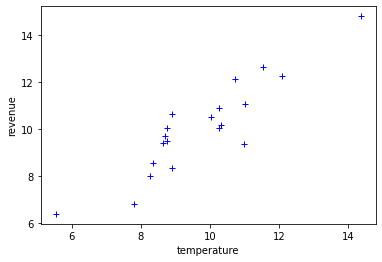

In [4]:
def generate_set(sigma, mu, size):
    return sigma * np.random.randn(size,1) + mu

def add_noise(m):
    return  np.random.randn(m, 1)

m = 20
X = generate_set(2,10, m)


theta = [0.25, 1]
# 1, q, b, q^2, qb, b^2
y = theta[0] + theta[1]*X

# - min(y) is used to get only positive values 
y = y + add_noise(m)

plt.plot(X, y, 'b+')
plt.xlabel('temperature')
plt.ylabel('revenue')
plt.show()

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X, y)

LinearRegression()

In [34]:
lr.intercept_

array([-0.72663936])

In [35]:
lr.coef_

array([[1.11079722]])

In [7]:
y_preds = lr.predict(X)

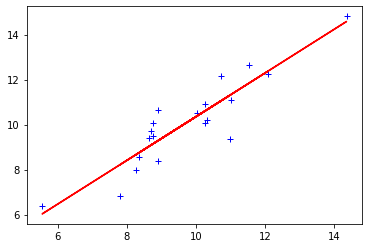

In [8]:
plt.plot(X, y, 'b+')
plt.plot(X, y_preds, 'r')

After we collected our data we fit our linear regression model. So we fit a straight line that can best fit our training data. 
And we have to evaluate our model by calculating the error which is the difference between the hypothesis predictions that are comming from our equation and the actuall true data points <code>**(true labels)**</code>. So usually we calculate residual which is the error or the difference between the  <code>**predictions and minus the ground truth**</code> for each point:

\begin{multline*}
\text{Residual (Error)} \ = \hat{y}_{i} - y_{i}
\end{multline*}

<code>**If the model would be perfect then that means the estimated will exactly match true labels and the error would be equal to 0**</code> 

We calculate each separate point error and we combine it into one single metric and there are different ways how we can combine it and thus there are different metrics that we can rely on that difference error.

Another important note is that here we are trying to calculate the error for the exact same data (training data). In practice we are going to have another data points which is our testing data points that we are going to calculate the error based upon. 

## Loss VS Metric

<code>**Loss**</code> - the function that our model will optimize. This function was created to use the internals of a specific model. Model will try to minimize this function and optimize it.
<br>
<code>**Metric**</code> - the function that we want to minimize to evaluate model itself and not on the development of the model.

<code>**Sometimes our function is both a loss and a metric**</code> but in general:

\begin{multline*}
\text{metric} \ \neq \ \text{loss function}
\end{multline*} 

## Mean absolute error  (MAE)

The first metric that we are going to look into is MAE:
    
   * Means absolure error <code>**(MAE)**</code> is obtained by calculating the absolute difference between the model predictions and the true actual values;

   * MAE is a measure of the <code>**average magnitude of error**</code> generated by the regression model;
   * The mean absolute error <code>**(MAE)**</code> is calculated as follows:
   
   \begin{multline*}
   MAE = \dfrac{1}{m}\sum_{i=1}^{m}|y_{i} - \hat{y}_{i}|
   \end{multline*}
   
It called absolute because we are going to calculate absolute value. As it is written in equation we will take <code>**every point and calculate the difference between every true value minus our every predictions**</code> sum them up and then we will obtain average, pretty straight forward. By steps it would look like this:

 * Calculate the residual of every data point
 * Calculate the absolute value (to get rid of the sign)
 * Calculate the average of all residual, by summing them up and dividing by overall number of samples

<code>**If MAE is 0, this indicates that the model predictions are perfect**</code>
<br>

### Key features:

* The lower the better;
* It is less sensitive to outliers than for example MSE;
* Easy interpretation, same units as y;
* Can work as both loos and metric.

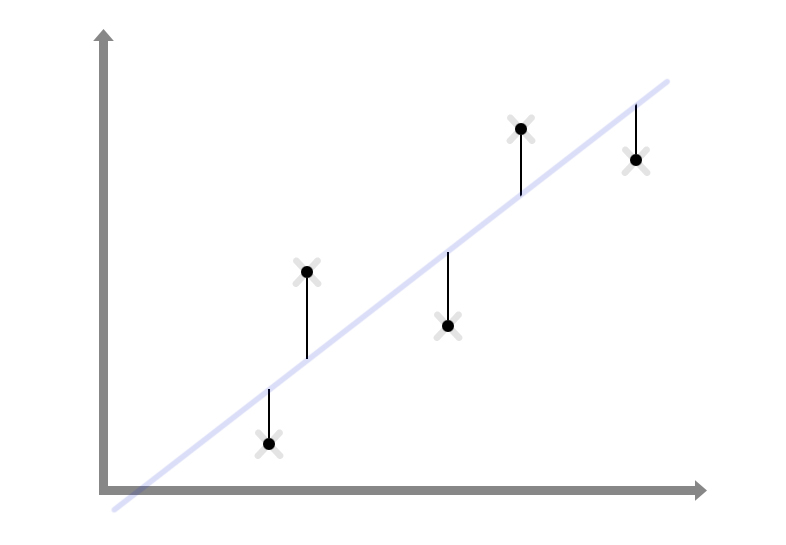

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

y_predict = model.predict(X)
mae     = mean_absolute_error(y, y_predict)
print(mae)

0.6494683938482242


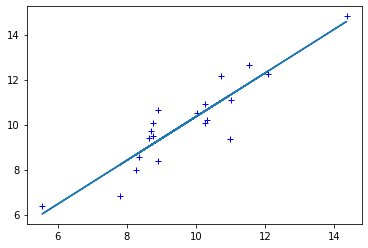

In [10]:
plt.plot(X, y, "b+")
plt.plot(X, y_predict)
plt.show()

<code>**NOTE!:**</code>It has a problem which is that <code>**absolute value function is not differtiable**</code><br>

<div class="alert alert-block alert-info">
The left limit does not equal the right limit, and therefore the limit of the difference quotient of f(x) = |x| at x = 0 does not exist. Thus the absolute value function is not differentiable at x = 0.
</div><br>

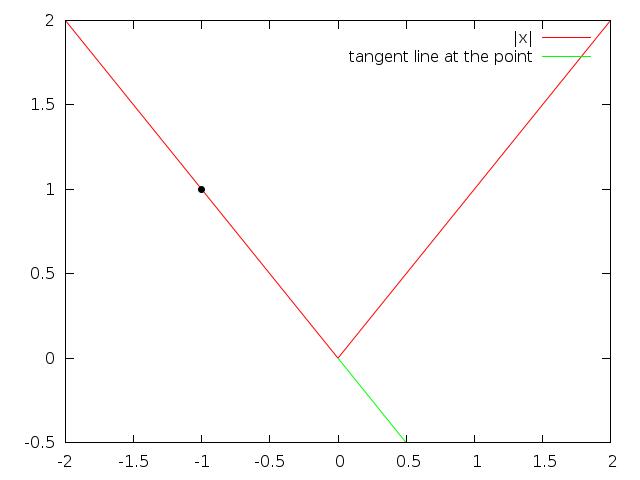

And this may not be good if we want to use methods such as gradient descent and to solve this problem we use more common mean square error method 

## Mean square error (MSE)

Second one metric is called Mean square error <code>**(MSE)**</code>
It should be quite familiar for us since we have used it quite extensively in previous lectures material and exercises. Its pretty much the similar to MAE but instead of obtaining the absolute value we are going to square it instead.

 * MSE value are generally larger compared to the MAE since the residuals are being squared.
 * In case of data outliers, MSE will become much larger compared to MAE
 * MSE error increase in a quadratic fashion while the error increases in proportional fashion in MAE
 * Since the error is squareed any predicting error is being heavily penalized.
 * The MSE is calculated as follows:

   \begin{multline*}
   MSE = \dfrac{1}{m}\sum_{i=1}^{m}(y_{i} - \hat{y}_{i})^2
   \end{multline*}
  
By steps it would look like this:

 * Calculate the residual for every data point
 * Calculate the squared value of the residuals
 * Calculate the average of result from step #2, by summing up the squared values and divide by overall number of samples
 
### Key features:
 
* The lower the better;
* Sensitive to outliers, exponential penalty for outliers;
* Interpretation, not the same units as y;
* Can work as both loos and metric. 
 
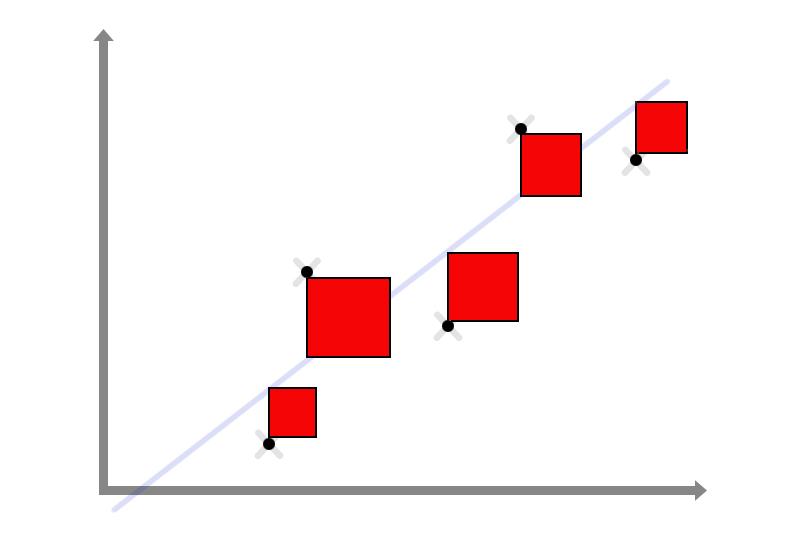

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
mse     = mean_squared_error(y, y_predict)
print(f"MAE:{mae}")
print(f"MSE:{mse}")


MAE:0.6494683938482242
MSE:0.6549511127181463


## Root mean square error (RMSE)

Root mean square error <code>**RMSE**</code> is  pretty simple as MSE just obtain the square root for it. 
Why do we need it ? Because there are problems with MSE, if the units are very different from the actual data points (because we already squared them up) so its hard to compare. But if obtain the square root mean of this data then we gonna back to match the units of the original data and its easier to compare.

It represents the <code>**standard deviation of the residuals**</code>( i.e difference between the model predictions and the true value(training data) to recall in statistics  that <code>**STD (standard deviation)**</code> is a measure of the dispersion from the mean which is how much is the spread away from the mean.

 * RMSE can be easily interpreted compared to MSE because <code>**RMSE units match the units of the ouput**</code> We simple squaring it up and then obtaining the square root so it's kind of canceling the effect of squaring pretty much
 * Provides an estimate oh <code>**how large the residuals are being dispersed.**</code>
 * RMSE is calculated as follows:
 
\begin{multline*}
RMSE = \sqrt{\dfrac{1}{m}\sum_{i=1}^{m}(y_{i} - \hat{y}_{i})^2}
\end{multline*}
   
By steps it would look like this:

 * Calculate the residual for every data point
 * Calculate the squared value of residuals
 * Calculate the average of the squared residuals
 * Obtain the square root of the result
 
 
### Key features: 

* The lower the better;
* Sensitive to outliers, but less than MSE;
* Interpretation, same units as y;
* Can work as both loos and metric. 

## Mean absolute percentage error (MAPE)

One problem with mean absolute error metric is than it can give whatever number (∞) which makes it difficult for result interpretation compared with the training data and thus giving an answer in a form of percentage is actually very beneficial because it is understandable(i.e my error is 8.25%).  In the example with ice cream revenue at the top of the lecture we can tell that our error is 12, 22, 2 but how can we assess that compared to our training data. So <code>**MAPE**</code> gives us a clear idea about how far off we are compared to our testing data(labels).

 * MAE values can range from 0 to infinity which makes it difficult to interpret the result as compared to the training data
 * Mean absolute percentage error <code>**(MAPE)**</code> is the equivalent to MAE but provide the error in a percentage from and therefore overcomes MAE limiations.
 * MAPE might exhibit some <code>**limitation if the data point value is 0)**</code>(since there is division operation involved)
 * The MAPE is calculate as follows:

\begin{multline*}
MAPE = \dfrac{100\text{%}}{m}\sum_{i=1}^{m}|(y_{i} - \hat{y}_{i})  /y_{i}|
\end{multline*}
  
By steps it would look like this:

 * Calculate the residual for every data point
 * Divide by the training data point value
 * Calculate the absolute value (to get rid of the sign)
 * Calculate the average and the multiply by a 100
 


## Mean percentage error (MPE)


 * <code>**MPE**</code> is similar to <code>**MAPE**</code> but without the absolute operation
 * MPE is usefull to provide an insight of how many positive errors are compared to the negative ones
 * The MPE is calculated as follow:
 
\begin{multline*}
MPE = \dfrac{100\text{%}}{m}\sum_{i=1}^{m}(y_{i} - \hat{y}_{i})  /y_{i}
\end{multline*}

## (R²) - coefficient of determination (a.k.a relative squared error RSE)

Simply R² is based on comparing our models to the simplest possible model. The simplest possible model that fits a bunch of data points would be to take the average of all the values and draw a horizontal line to through them and calculate the <code>**mean squared error**</code> for this model.
We woudld hope that the mean squared error for the simple model is larger than the error for linear regression model. <code>**The question how much larger?**</code>. We can divide the error for the the linear regression model by the error of the simple model and the subtract the result from <code>**1**</code> and we will call this result <code>**r2 score**</code>.


 *  <code>**If the model is not very good then the two errors should be similar and division quantity should be close to 1 so the r2 score should be close to 0.**</code> 
 
 
 *  <code>**If the model is good  the mean squared error of the linear regression model should be a lot smaller than the mean squar error for the simple model there the ration of division should be small and then the r2 score should be very close to 1. .**</code> 

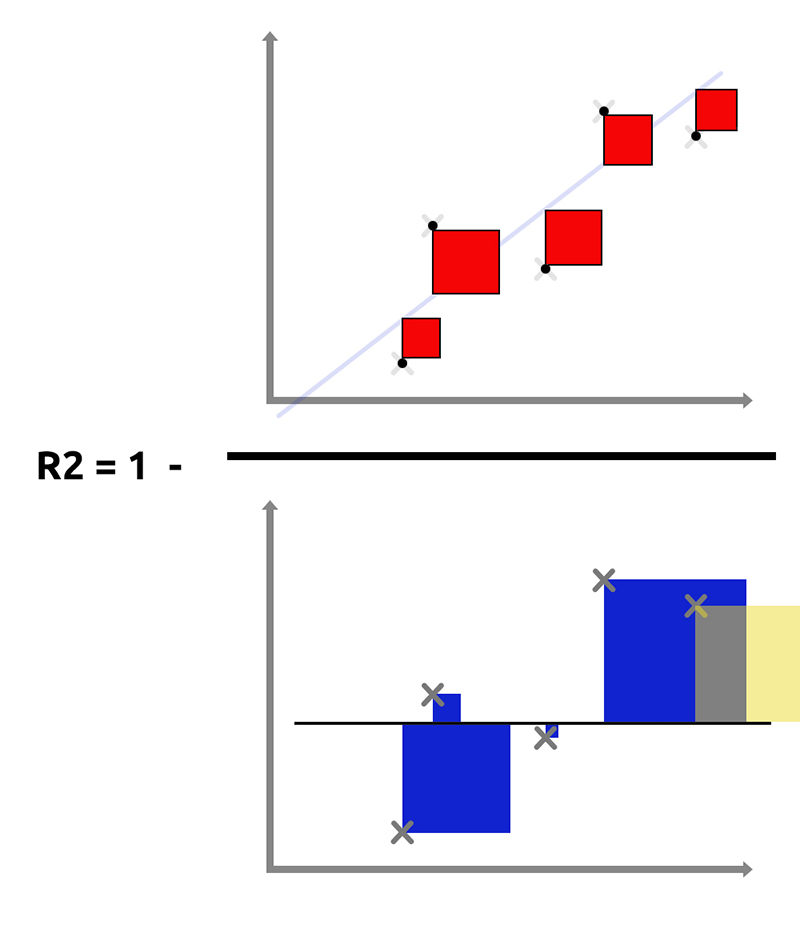

<code>**If the r2 score is close to 0 then the model is not much better than just guessing the average of the point values**</code>

So in practice r-square or the coefficient of determination we can say <code>**represents the proportion of variance(of dependent variable y) that has been explained by independent variable(x) in the model**.</code> 
For examxple if R² = 80 this means that 80% of the <code>**increase in ice cream cart revenue is due to increase in temperature**.</code> 


 * R-square provides a insight of <code>**goodness of fit**</code>
 * It gives a measure of <code>**how well unsee samples are likely to be predicted by the model, through the proportion of explained variance**</code>
 * A constant model that always predicts the expected value of y, disregarding the input features will have an R² score of 0.0. Basically its useless model
 
\begin{multline*}
R^{2} =   1 - \dfrac{SS_{\text{residuals}}}{SS_{\text{total}}}
\end{multline*}

<code>**Variance from actual prediction**</code>
\begin{multline*}
SS_{\text{residuals}} = \sum(y_{i} - \hat{y})^2
\end{multline*}

<code>**Total variance in the data set**</code>
\begin{multline*}
SS_{\text{total}} = \sum(y_{i} - \overline{y})^2
\end{multline*}


<code>**General equation form**</code>

\begin{multline*}
R^{2} =   1 - \dfrac{\text{unexplained variance}}{\text{explained variance}}
\end{multline*}

<code>**If all the variance in the model was explained(error was 0 then R² = 1, R² will be between 0 and 1, larger is better**</code>

\begin{multline*}
R^{2} = 1- \dfrac{\sum_{i=1}^{m}(y_{i} - \hat{y}_{i})^{2}}{\sum_{i=1}^{m}(y_{i} - \overline{y})^{2}}
\end{multline*}


 
### Key features: 

* The higher the better;
* Compares our model errors against a model that just predicts the mean value;
* If we get R² < 0 we are likely overshooting;
* Use to determine how well predictions will be for new obeservations; 

In [12]:
from sklearn.metrics import r2_score

# y_true = [1, 2, 4, 5, 6, 7, 8, 9, 10]
# y_pred = [1.5, 2.5, 4.2, 5.5, 6.15, 6.5, 6.7, 6.8, 6]

# r2 = r2_score(y_true, y_pred)
score  = model.score(X, y)
print(score)
#print(r2)

r2 = r2_score(y, y_predict)
print(r2)

0.8266719449278823
0.8266719449278823


## Adjusted R²

<code>**NOTE:!**</code> R² can be tricky because we add a lot of features and R² will always increase so our fantastic model with millions of features can be very misleading. Because we are feeding more and more stuff and that might be practically worthless. But Adjusted R² has a way to penalize by the number of features in model.  Adjusted R² is very usefull for compring different numbers of features. 

Again if R² = 80 this means that 80% increase in dependent variable y value is due to increase of independent variable.<br>
Lets add another 'useless' independent variable, let's say level of education of ice cream salesperson to the z-axis.<br>
Now R² increases and becomes 85% and looks good so lets continue adding independant variabls. Unfortunately some of these parameters might be useless, redundant etc. This is the reason to use <code>**Adjusted R²**</code> for this one R² limitation that it increases by addding independant variables to the model which is <code>**misleading**</code> since some addded variables migh be useless with minimal significance.

Adjusted R² overcome this issue by addding a penalty if we make an attempt to add independent variable that does not improve the model. If we add this parameter and it does not improve our model we are going to penalize it. Think about it as sort of like <code>**gain that came out of this indpendent variable addition has to outweight the impact that we added**</code>

 * Adjusted R² is modified version of the R² and take into account the number of predictors in the model.
 * If useless predictors are added to the model Adjusted R² will decrease and vise versa.
 * <code>**K**</code> is the number of independent variables and <code>**m is the number of samples**</code>


\begin{multline*}
R^{2}_{\text{adjusted}} = 1- [\dfrac{(1-R^{2})(m-1)}{m-k-1}]
\end{multline*}

In [13]:
m = 50
k = 2
adj_r2_score = 1 - (1 - r2) * (m - 1)/ (m - k - 1)
print(adj_r2_score)

0.8192962830099199



<code>**NOTE:!**</code> The increase of R² has to outweight the number of K or the additional parameters that we add.

 
### Key features: 

* The higher the better;
* Adjusted for the number of predictors in the model;
* Use to compare models with different numbers of predictors (features); 


## Practise  to use metrics

We went through different method of assesing error in samples our model wasn't trained on:

 * Better measure of model fit
 * We get an idea of how good the model will perfomr on unseen data

We don't want to measure our metrics using the same function as a loss on train data. Use it only as loss that is the objective function trying to minimize that loss. We can use the same function for loss and metric on validation(test) but in general <code>**treat train set and test set as a different population**</code>. Everything has to be fair and square unbiased to objectively evaluate how our model will generalize to the real situation.

## Data split

TODO: more written explanations and visual samples.


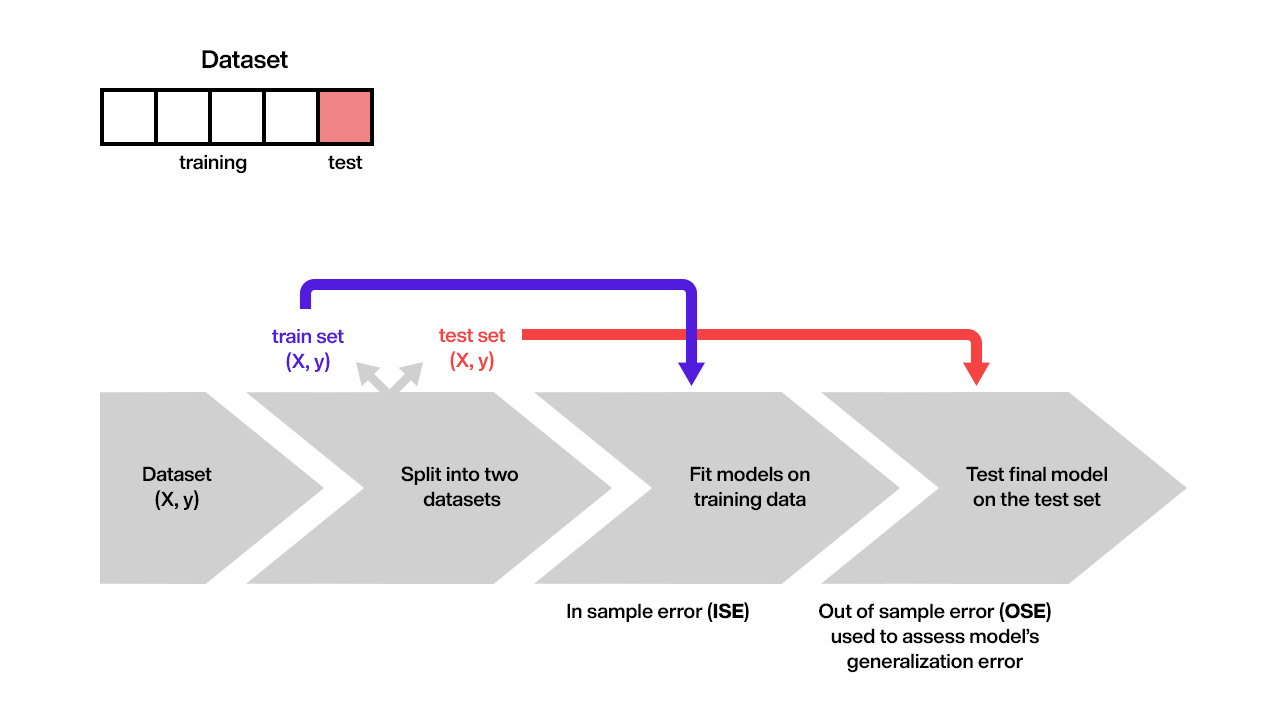




In the begining of the lecture, i.e we had a task to develop a regression model that models the relationship between the temperature on the x axis and the sales revenue on y axis. Now lets apply all of these metric method to our example and assess and compare them.

[scikit-learn metrics documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

<code>**NOTE!:**</code> The function mean_absolute_percentage_error is new in scikit-learn version 0.24, make sure your local version is up to date. Shutdown jupyter notebook kernels and run:

<code>**`pip install -U scikit-learn`**</code>

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error)<br>
[Mean square error](https://en.wikipedia.org/wiki/Mean_squared_error)<br>
[Root mean square error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)<br>
[R²](https://en.wikipedia.org/wiki/Coefficient_of_determination)<br>
[Adjusted R²](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

<code>**Optional:**</code><br>
[Mean absolute percentage error](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)<br>
[Mean percentage error](https://en.wikipedia.org/wiki/Mean_percentage_error)<br>

Sklearn library provides all necessary tools:

In [30]:
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression, SGDRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## TODO:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2)

## Cross validation a.k.a CV


When evaluating different settings (parameters) for estimator, such as the there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.


The more we average trough different test sets the more generalization happens. We are using different data to get some function that may not overfit the training . By using same data set we can interchange training and validation folds.

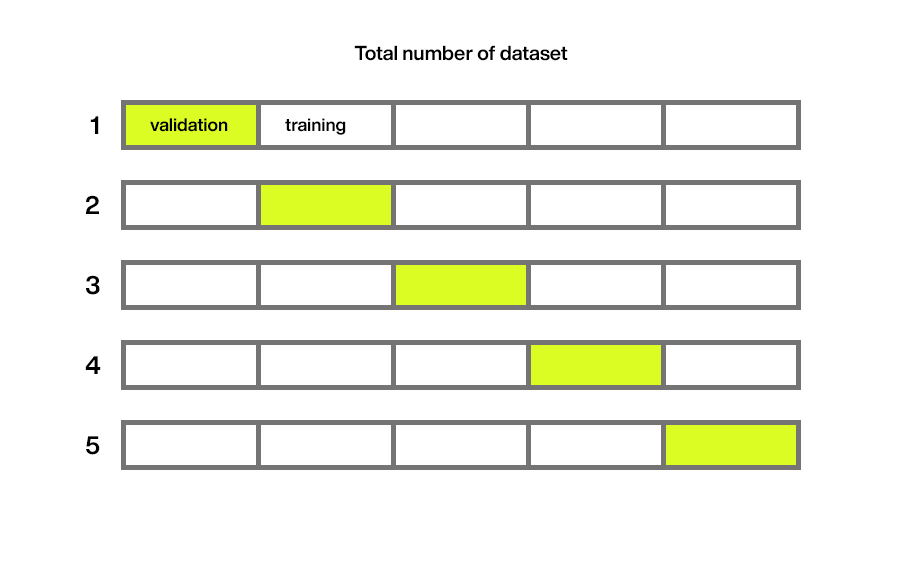
 * <code>**Measure the mean and variance of the scores across each fold**</code>
 * <code>**Used to approximate the OSE when we don't have a lot of data**</code>

We can use also our metrics with cross-validation to asess the best estimator using mean average error

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor

clfs = {
    'LinearRegressor': LinearRegression(),
    'SGDRegressor'   : SGDRegressor()
}

for key, clf in clfs.items():
    clf.fit(Xtrain, ytrain)
    
K = 5
for key, clf, in clfs.items():
    scores = cross_val_score(clf, x_clf, y, cv=K, scoring = 'neg_mean_absolute_error')
    print(f'Esitamtor: {key}')
    print(f'Negative MAE avg.: {scores.mean()}')


C:\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


NameError: name 'x_clf' is not defined

## Overfitting and underfitting

### Overfitting
A scenario where the ML model tries to learn from te details along with the noise in the data and tries to fit each data point on the curve

<code>**Major reasons for overfitting:**</code>

 * Data used for training is not cleaned and contains noise (as garbage values) in it
 * The model has high variance
 * Size of training data used is not enough
 * Model is to complex
 
 
### Underfitting
A scenario when ML model can neither learn the relationship between varabiles in the data nor predict or classifiy a new datapoint

<code>**Major reasons for underfitting:**</code>

 * Data used for training is not cleaned and contains noise (as garbage values) in it
 * The model has high bias
 * Size of training data used is not enough
 * Model is too simple

## Recap

 * Some of the mostly used metrics are computed directly from the error of all the sample: MAE, MSE, RMSE
 * Coefficient of determination R² cal also be used to measure how good the model explains the data and its adjusted version allows for it to be applied to models with high numbers of coefficients.
 * Thse metrics can be used to perform model selection based on how good it perfoms on unseen data

# DRAFT not ready


In [28]:
model = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lr', LinearRegression())
])

MSE = lambda y, y_hat: ((y - y_hat)**2).mean()

metrics = { 
    'MSE': MSE
}

models = {
    'Lin_Regressor': LinearRegression(),
    'SGD_Regressor': SGDRegressor()
}